# MNIST Hand Written Digit Recognition (SciKit-Learn and skorch)

Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs.



For this tutorial we will be utilizing colab to execute python code and packages in order to classify handwritten digits with a Neural Network. The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. We will be training our neural netowrk from this dataset so that we can make predictions.




Before we begin we want to enable GPU exceleration to increase our processing power.

Naviagte through **Runtime** > **Change Runtime Type** > **Hardware Excerlerator** and select GPU.



In [0]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Download and prepare the MNIST data set

mnist_data is comprised of a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.

The data and target ( x and y) are in Uint8 and is also converted to float32 and int64 so we can process and understand the information.

We convert the data types and scale down the x range of 0-255 to 0-1

In [0]:
mnist_data = fetch_openml('mnist_784', cache=False)

In [4]:
x = mnist_data.data.astype('float32')
y = mnist_data.target.astype('int64')
x = x / 255.0

x.min(), x.max()


(0.0, 1.0)

#Create train and test datasets, normalize the table.
We will be using a training set for the Neural Netowrk to learn from. Then testing its knowledge by splitting a test sample to verify its accuracy.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
assert(x_train.shape[0] + y_test.shape[0] == mnist_data.data.shape[0])

#Confirmation printing of digits with label

This will be used later to visiaulize our test predicitons.


In [0]:
def plot_test(x, y):
    """Test Print first 5 images in dataset provided"""
    for i, (img, y) in enumerate(zip(x[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

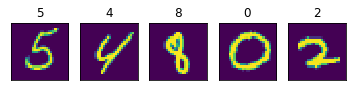

In [12]:
plot_test(x_train, y_train)